# Project: Investigating TMDb movie dataset  
## Table of content:  
* Introduction  
* Data Wrangling  
* Exploratory Data Analysis  
* Conclusions

### Introduction  
This is an investigation on TMDb movie dataset. This data set contains information about 10,000 movies collected from The Movie Database (TMDb).
In this investigation I will be using exploratory data analysis to answer some questions and make some inferences about the dataset. The tools i will be putting to use in thiis investigation include but not limited to pandas, matplotlib, numpy and seaborn.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns


## Data Wrangling  
Checking the general properties of data while looking out for parts of the data that might need cleaning.

In [2]:
movie_df = pd.read_csv('tmdb-movies.csv', index_col='id')
movie_df.head(2)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


##### **Data Description**  
* id: Identification Number
* imdb_id: IMDb Identification Number
* popularity: Popularity of movie in number
* budget: Movie budget
* revenue: Revenue generated by movie
* original_title: Title of the Movie
* cast: Cast
* homepage: Movie website homepage
* director: Movie director
* tagline: Catch phrase for movie
* keywords: Keywords for search engines
* overview: Summary of the movie
* runtime: movie time in minutes
* genres: Movie category
* production_companies: Companies that produced the movie
* release_date: The date the movie was released
* vote_count: Voted for the movie
* vote_average: The average vote rate our of 10
* release_year: Movie release year
* budget_adj: Movie Budget including 2010 inflation
* revenue_adj': Movie Revenue including 2010 inflation

In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  object 
 15  vote_count    

In [4]:
movie_df.shape

(10866, 20)

In [5]:
movie_df.isna().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
movie_df.duplicated().sum()

1

#### Findings from data wrangling  
From a preview of the dataset it has been observed that there are some issues that will need to be attended to in order to have it ready for analysis. these are;  
* Some columns not useful for my analysis will have to be dropped.
* Columns with multiple values which will have to be expanded into distinct rows for analysis.
* Null and missing values.
* columns with wrong data type.
* Columns with 0 values.

## Data Cleaning  
Here, issues observed at the wrangling phase will be addressed.  
#### Unwanted Columns

In [7]:
# Drop columns not needed for analysis

movie_df.drop(columns=['imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'budget_adj', 'revenue_adj'], inplace=True)
movie_df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

In [8]:
movie_df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

#### Multiple Value Columns  
Create helper function (**expand_column**) to apply to help deal with columns with multiple values for analysis.

In [9]:
#movie_df['col'].str.split('|').explode()

def expand_column(a: pd.DataFrame, b:str):
    """Expanding columns with multiple values"""
    a_copy = a.copy()
    a_copy[b] = a_copy[b].str.split('|')
    return a_copy.explode(b)

#### Null and Duplicate  
Considering the size dataframe, the null and duplicated values are negligible it is there for okay to drop them

In [10]:
# Drop Null and Duplicates

movie_df.dropna(inplace=True)
movie_df.drop_duplicates(inplace=True)


In [11]:
# Confirm missing values dropped
movie_df.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [12]:
# Confirm deuplicates dropped.
movie_df.duplicated().sum()

0

In [13]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 135397 to 22293
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9772 non-null   float64
 1   budget                9772 non-null   int64  
 2   revenue               9772 non-null   int64  
 3   original_title        9772 non-null   object 
 4   cast                  9772 non-null   object 
 5   director              9772 non-null   object 
 6   runtime               9772 non-null   int64  
 7   genres                9772 non-null   object 
 8   production_companies  9772 non-null   object 
 9   release_date          9772 non-null   object 
 10  vote_count            9772 non-null   int64  
 11  vote_average          9772 non-null   float64
 12  release_year          9772 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.0+ MB


#### Changing datatypes
From review of the dataframe info, release_date is of object type which will need to be changed to date time. However, after this change is done, it is observed that the release date returns some unrealistic dates. This I will infer is largely as a result of the programing language datetime starts from 1971. therefore the year part of the date time has to be replaced by the release year given.

In [14]:
movie_df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


In [15]:
# Replace year part of release_date with release_year
movie_df.release_date = movie_df.apply(lambda x: x.release_date[:-2] + str(x.release_year), axis=1)

In [16]:
# Confirm replacement
movie_df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015


In [17]:
# Change release_date to datetime
movie_df.release_date = pd.to_datetime(movie_df.release_date)

In [18]:
# Confirm data type
movie_df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object


#### Columns with 0 values

In [19]:
movie_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428
std,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


From the description of the dataframe above, it is seen that some columns have zero values. This will have to be dealt with. To do this these zero values will need to be checked to see if they are significant enough to affect the analysis.

In [20]:
movie_df[['budget', 'revenue', 'runtime']].apply(lambda x: x == 0).sum()

budget     4751
revenue    5022
runtime      13
dtype: int64

**NOTE**  

The result above shows that rows with zero values are quite significant. This leaves me at a crossroad as dropping these much rows might skew insights gotten from the analysis. On the other hand I could fill these zero values with means of their occuring years, but that could also skew the analysis as attributes like budget are unique to the movies. For my analysis however, I have therefore decided to drop zero values and work with whatever is left of the original data which is also significant.

In [21]:
movie_df = movie_df.query('budget != 0 & revenue != 0 & runtime != 0')
movie_df.shape

(3805, 13)

## **Exploratory Data Analysis**  
Questions to answer;
* Which are the most successful and unsuccessful novies?
* Is popularity related to movie success?
* Which are the most popular genres?
* Is movie success related to time of release?

### **Which are the most successful and unsuccessful novies?**  

To continue this analysis, the net profit column needs to be created as it is important to this analysis in determining successful and unsuccessful movies.

In [22]:
movie_df['net_profit'] = movie_df.revenue - movie_df.budget

In [23]:
movie_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,net_profit
count,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03
mean,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172,7.136540e+07
std,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616,1.513764e+08
min,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,-4.139124e+08
25%,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000,-1.173477e+06
50%,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000,2.047434e+07
75%,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000,8.347333e+07
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,2.544506e+09


From the summary statistics of the data, I will take successful movies to be those with net profit of 75% and above, while unsuccessful movies will be those with net profit of 50% and below. However I will be confirming this with plots of top 10 successful and unsuccessful movies.

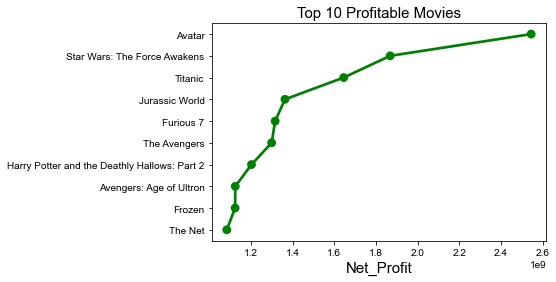

In [24]:
# Plot of top 10 most profitable movies.

successful = pd.DataFrame(movie_df['net_profit'].sort_values(ascending = False))

# Creating new column 'title' in the new dataframe from the original dataframe
successful['title'] = movie_df['original_title']
x = list(map(str,(successful['title'])))
x = list(x[:10])
y = list(successful['net_profit'][:10])

# Using pointplot
ax = sns.pointplot(x=y,y=x, color='green')

sns.set(rc={'figure.figsize':(10,7)})
# Setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Net_Profit",fontsize = 15);

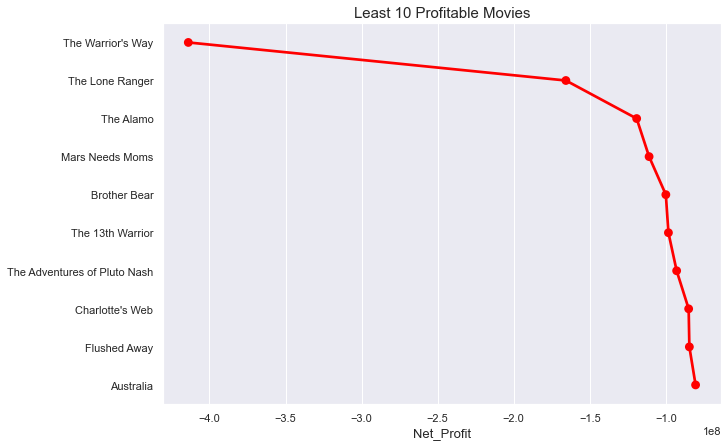

In [25]:
# Plot of top 10 most unsuccessful movies.

unsuccessful = pd.DataFrame(movie_df['net_profit'].sort_values(ascending = True))

#creating new column title' in the new dataframe from the original dataframe
unsuccessful['title'] = movie_df['original_title']
x = list(map(str,(unsuccessful['title'])))
x = list(x[:10])
y = list(unsuccessful['net_profit'][:10])

# Using pointplot
ax = sns.pointplot(x=y,y=x, color='red')

sns.set(rc={'figure.figsize':(10,7)})

#setup the title and labels of the plot.
ax.set_title("Least 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Net_Profit",fontsize = 13);

##### **Findings**  
The most commercially successful movie is Avatar, while the most unsuccessful movie is The Warrior's Way

### **Is popularity related to movie success?**

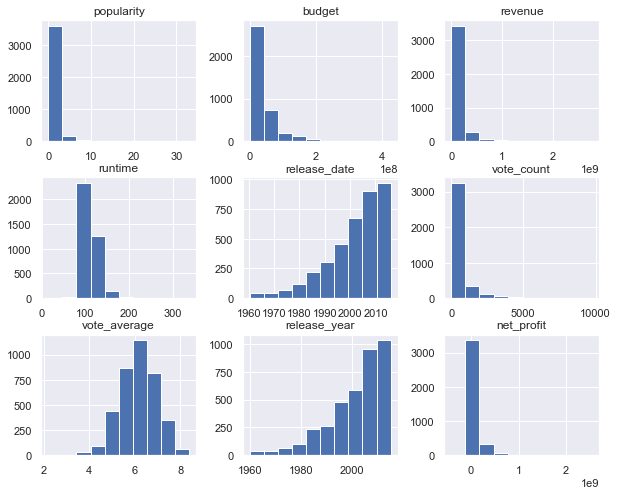

In [26]:
movie_df.hist(figsize= (10, 8));

##### **Findings**
From the popularity histogram it is seen that over 90% of the movies are not popular, that is with popularity less than mean popularity. However the histogram of both popularity and net profit are both skewed to the right which would infer positive correlation between the 2 attributes. 
That is, the more popular a movie, the higher its commercial success. 


### **Which are the most popular genres?**

In [27]:
# Create a new dataframe for movie genres by putting to use the helper function earlier greated.
genre_df = expand_column(movie_df, 'genres')
genre_df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,net_profit
id,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810


In [28]:
genre_df.genres.unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

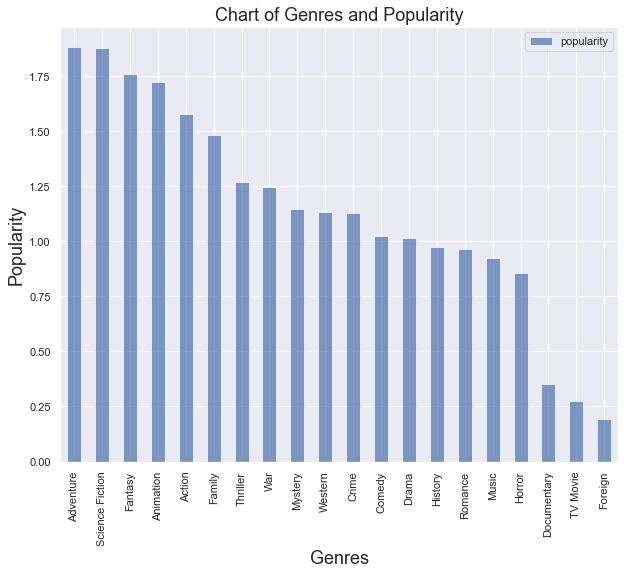

In [29]:
# Group dataframe by genre and store in a new dataframe

grouped_by_genre = genre_df.groupby('genres')

# Get mean of popularity and sort by popularity
 
popular_genre = grouped_by_genre.popularity.mean().reset_index().sort_values('popularity', ascending=False)
#popular_genre.head(5)

popular_genre.plot(kind='bar', x='genres', y='popularity', alpha=.7, figsize = (10,8))
plt.ylabel('Popularity', fontsize=18)
plt.xlabel('Genres', fontsize=18)
plt.title('Chart of Genres and Popularity', fontsize=18);



##### **Findings**
From the chart above it is evident that Adventure is the most popular of all the genres, closely followed by Science fiction, Fantasy, Animation and Action.

#### **Most Profitable Genres**

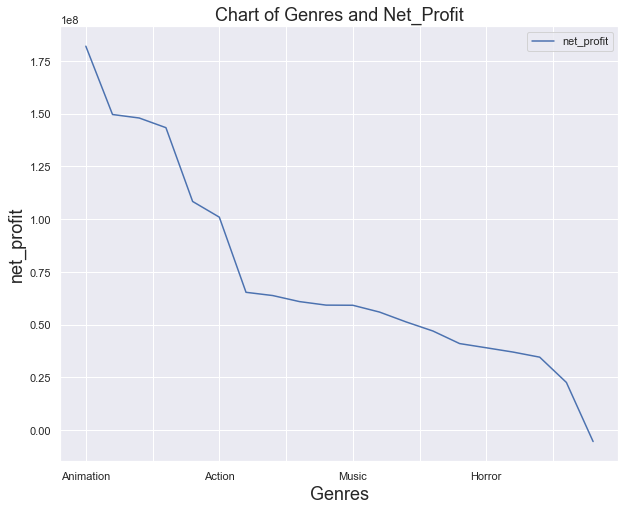

In [30]:
# Group dataframe by net profit and store in a new dataframe

grouped_by_profit = genre_df.groupby('net_profit')

# Get mean of net profit and sort by net profit
 
genre_by_profit = grouped_by_genre.net_profit.mean().reset_index().sort_values('net_profit', ascending=False)

genre_by_profit.plot(kind='line', x='genres', y='net_profit', figsize = (10,8))
plt.ylabel('net_profit', fontsize=18)
plt.xlabel('Genres', fontsize=18)
plt.title('Chart of Genres and Net_Profit', fontsize=18);

##### **Findings**
Above plot shows that Animation is the most profitable genre.

 ### **Is movie success related to time of release?**  
 To answer this, I will create month column in the original dataframe, then create a new dataframe to analyse the time of movie release and correlation to success.

In [31]:
#Creating a new column called month from the released date
movie_df['month'] = movie_df['release_date'].dt.month_name()
# Confrim successful column creation
movie_df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,net_profit,month
id,,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810,June


In [32]:
# Create a new dataframe grouped by month for analysis
profit_by_month = movie_df.groupby(['month'], as_index=False).mean()

profit_by_month.head(2)

,month,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,net_profit
0,April,1.023161,3.548377e+07,9.673211e+07,105.927203,491.176245,6.057088,2002.038314,6.124834e+07
1,August,1.003299,3.017547e+07,7.121856e+07,104.583832,365.730539,5.988922,2001.685629,4.104309e+07


In [33]:
# Sort month
sort_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
profit_by_month.index= pd.CategoricalIndex(profit_by_month['month'], categories= sort_order, ordered= True )
profit_by_month  = profit_by_month.sort_index()

In [34]:
#Confirm month sorted
profit_by_month.head(5)

,month,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,net_profit
month,,,,,,,,,
January,January,0.984777,2.342712e+07,5.465417e+07,101.598174,377.684932,5.925571,2003.995434,3.122705e+07
February,February,0.967094,3.134132e+07,7.275517e+07,104.932540,391.503968,6.069841,2002.920635,4.141385e+07
March,March,1.262158,3.825189e+07,1.043026e+08,106.851986,565.548736,6.076895,2002.079422,6.605076e+07
April,April,1.023161,3.548377e+07,9.673211e+07,105.927203,491.176245,6.057088,2002.038314,6.124834e+07
May,May,1.468545,5.114158e+07,1.702861e+08,112.720690,755.744828,6.260000,2001.358621,1.191445e+08


In [35]:
# Drop index column
profit_by_month = profit_by_month.reset_index(drop=True)
#confrim index column dropped
profit_by_month.head(2)

,month,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,net_profit
0,January,0.984777,2.342712e+07,5.465417e+07,101.598174,377.684932,5.925571,2003.995434,3.122705e+07
1,February,0.967094,3.134132e+07,7.275517e+07,104.932540,391.503968,6.069841,2002.920635,4.141385e+07


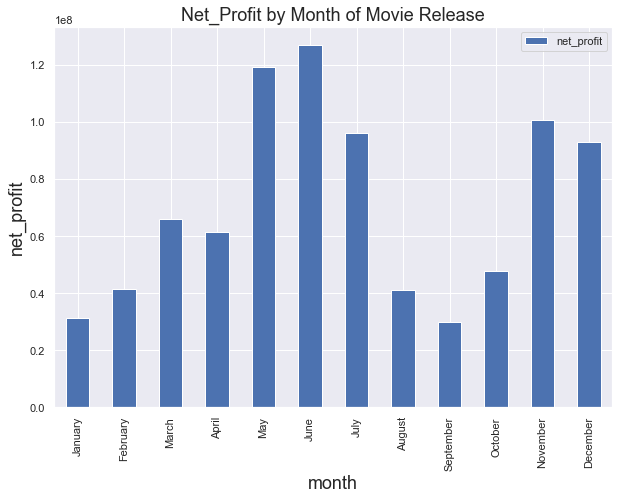

In [36]:
profit_by_month.plot(kind = 'bar', x='month', y='net_profit')
plt.ylabel('net_profit', fontsize=18)
plt.xlabel('month', fontsize=18)
plt.title('Net_Profit by Month of Movie Release', fontsize=18);

##### **Findings**  
From the chart above, the most profitable movies are seen to have been released during summer and winter and these are usually holiday seasons, this therefore infers that movies success is related to time of release

### **Conclusion**

After ample wrangling and analyzing of the TMDb dataset and answering some questions through visualisation, below is a summary of my limitations and findings;  

* My findings are limited as I only carried out exploratory data analysis on the dataset.
* Movies like Avatar, Star Wars, Titanic grossed highest profits while the likes of The Warrior's Way, The Lone Ranger and The Alamo returned the least profits.
* The Genre with highest popularity is Adventure, however Animation appears to be the the most profitable genre.  
* Popularity and net profits skewed in same direction could mean a positive correlation between the two attributes.
* My findings are tentative as it will require more in-depth analysis to give concrete insights of the data. 

##### **Limitations**  
* The dataset was greatly limiting as it contained many irregularities, missing data, zero values in entries that ought to have significant values.
* As a result of the nature of the dataset I had to drop some unwanted columns and also rows that had zeroes values, NA and duplicate this led to a huge reduction in the size of the dataset that had adverse effects on my analysis.

#### Resources
* Stackoverflow
* Github
* Kaggle
* ALX-T Udacity Class lessons
* [Visualisation](https://pianalytix.com/data-visualization-using-seaborn-and-types-of-plots-in-seaborn/)  
* [Working with lambda](https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7)